![](_fig/labeled.jpg)

# PyStudio 5: Using Multiple Models

### Setup Workspace

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [4]:
from keras.models import Sequential  
from keras.layers import Dense

In [5]:
import matplotlib.pyplot as plt

In [6]:
os.chdir("/home/drewc/allocativ/py4hc")

In [7]:
df_doh = pd.read_csv("_data/doh.csv")

In [8]:
df_doh.info()
df_doh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ZCTA            970 non-null    object 
 1   PERCENT_TOTAL   970 non-null    float64
 2   POPULATION      970 non-null    int64  
 3   A00_B99_R1000   970 non-null    float64
 4   Benign_R1000    970 non-null    float64
 5   D50_D64_R1000   970 non-null    float64
 6   E00_E99_R1000   970 non-null    float64
 7   G00_G99_R1000   970 non-null    float64
 8   J00_J99_R1000   970 non-null    float64
 9   K00_K99_R1000   970 non-null    float64
 10  N00_N99_R1000   970 non-null    float64
 11  O00_O07_R1000   970 non-null    float64
 12  O10_O99_R1000   970 non-null    float64
 13  P00_P99_R1000   970 non-null    float64
 14  Q00_Q99_R1000   970 non-null    float64
 15  Abnormal_R1000  970 non-null    float64
 16  Residual_R1000  970 non-null    float64
 17  V01_Y89_R1000   970 non-null    flo

,ZCTA,PERCENT_TOTAL,POPULATION,A00_B99_R1000,Benign_R1000,D50_D64_R1000,E00_E99_R1000,G00_G99_R1000,J00_J99_R1000,K00_K99_R1000,N00_N99_R1000,O00_O07_R1000,O10_O99_R1000,P00_P99_R1000,Q00_Q99_R1000,Abnormal_R1000,Residual_R1000,V01_Y89_R1000,SIDS_R1000
0,ZCTA32830,2.430000e-07,5,0.00,0.0,0.0,0.00,0.0,0.00,200.00,0.0,0.0,0.0,0.0,0.0,0.00,200.00,0.00,0.0
1,ZCTA34141,3.255000e-06,67,0.00,0.0,0.0,14.93,0.0,0.00,29.85,0.0,0.0,0.0,0.0,0.0,29.85,14.93,179.10,0.0
2,ZCTA32356,4.420000e-06,91,0.00,0.0,0.0,10.99,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
3,ZCTA34679,5.003000e-06,103,0.00,0.0,0.0,0.00,0.0,29.13,0.00,0.0,0.0,0.0,0.0,0.0,0.00,9.71,19.42,0.0
4,ZCTA33122,5.295000e-06,109,9.17,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,9.17,18.35,0.0


In [9]:
df_acs = pd.read_csv("_data/acs.csv")

In [10]:
df_acs.info()
df_acs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32829 entries, 0 to 32828
Columns: 478 entries, FIPS to DP05_0031PE
dtypes: float64(427), int64(48), object(3)
memory usage: 119.7+ MB


,FIPS,ZCTA,ST,DP02_0001PE,DP02_0002PE,DP02_0003PE,DP02_0004PE,DP02_0005PE,DP02_0006PE,DP02_0007PE,...,DP05_0021PE,DP05_0022PE,DP05_0023PE,DP05_0024PE,DP05_0025PE,DP05_0026PE,DP05_0027PE,DP05_0029PE,DP05_0030PE,DP05_0031PE
0,FIPS01001,ZCTA36003,AL,913,59.9,12.8,44.4,11.3,2.4,1.0,...,89.4,83.6,27.1,23.0,1696,44.6,55.4,436,54.1,45.9
1,FIPS01001,ZCTA36067,AL,10351,72.7,30.8,55.7,22.5,3.4,1.2,...,75.0,69.9,16.9,14.0,21545,47.3,52.7,4026,43.2,56.8
2,FIPS01001,ZCTA36066,AL,7950,68.3,34.9,53.7,26.5,4.7,2.7,...,75.1,73.7,17.0,15.1,14339,48.1,51.9,2878,42.9,57.1
3,FIPS01001,ZCTA36006,AL,423,58.4,15.1,45.6,12.3,4.3,0.0,...,91.2,85.9,30.6,24.9,833,44.8,55.2,227,37.0,63.0
4,FIPS01001,ZCTA36051,AL,832,74.8,30.5,58.7,18.4,2.2,0.0,...,79.4,76.2,16.0,11.8,1672,51.6,48.4,249,36.1,63.9


### Process Data

In [11]:
df_doh = df_doh.filter(["ZCTA", "E00_E99_R1000"])

In [12]:
df_zip = pd.merge(df_doh, df_acs, on = "ZCTA", how = "inner")

In [13]:
df_zip = df_zip.drop(columns = ["ZCTA", "FIPS", "ST"])

In [14]:
df_zip["E00_E99_R1000"].describe()

count    963.000000
mean       1.652118
std        1.193997
min        0.000000
25%        0.940000
50%        1.440000
75%        2.125000
max       14.930000
Name: E00_E99_R1000, dtype: float64

In [15]:
df_zip["train"] = np.where(df_zip["E00_E99_R1000"] > 2.125, 1, 0)
df_zip["test"] = np.where(df_zip["E00_E99_R1000"] > 1.44, 1, 0) 

In [16]:
df_zip = df_zip.dropna(axis = 1, thresh = 0.75*len(df_zip))
df_zip = pd.DataFrame(SimpleImputer(strategy = "median").fit_transform(df_zip), columns = df_zip.columns)

In [17]:
df_zip = pd.DataFrame(StandardScaler().fit_transform(df_zip.values), columns = df_zip.columns)

In [18]:
X = df_zip.drop(columns = ["E00_E99_R1000", "test", "train"])
Y_train = df_zip["train"]
Y_test = df_zip["test"]
Y_quant = df_zip["E00_E99_R1000"]

In [19]:
df_zip.info()
df_zip.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Columns: 478 entries, E00_E99_R1000 to test
dtypes: float64(478)
memory usage: 3.5 MB


,E00_E99_R1000,DP02_0001PE,DP02_0002PE,DP02_0003PE,DP02_0004PE,DP02_0005PE,DP02_0006PE,DP02_0007PE,DP02_0008PE,DP02_0009PE,...,DP05_0023PE,DP05_0024PE,DP05_0025PE,DP05_0026PE,DP05_0027PE,DP05_0029PE,DP05_0030PE,DP05_0031PE,train,test
0,-1.384406,-1.377126,-5.271093,-2.118218,-3.670303,-1.655552,-1.377810,-0.859233,-1.800752,-1.439508,...,-1.952363,-1.770337,-1.348363,7.892353,-7.892353,-1.181130,-0.069841,0.069827,-0.577750,-0.99689
1,11.126307,-1.375035,2.797240,-2.118218,3.893187,-1.655552,-1.377810,-0.859233,-1.800752,-1.439508,...,-1.167544,-0.927699,-1.345516,2.194635,-2.194635,-1.179170,6.883795,-6.883779,1.730853,1.00312
2,7.824753,-1.369982,2.797240,-2.118218,3.893187,-1.655552,-1.377810,-0.859233,-1.800752,-1.439508,...,1.783076,-1.770337,-1.341563,0.030747,-0.030747,-1.181130,-0.069841,0.069827,1.730853,1.00312
3,-1.384406,-1.368762,-0.704417,0.461647,-1.529836,-1.655552,6.812682,10.162933,-1.800752,-1.439508,...,1.051081,0.749474,-1.341958,-2.242113,2.242113,-1.172168,0.083830,-0.083843,-0.577750,-0.99689
4,-1.384406,-1.369808,-0.978740,0.406951,0.353473,1.355590,-1.377810,-0.859233,-1.800752,-1.439508,...,-1.190183,-1.770337,-1.342354,3.657983,-3.657983,-1.181130,-0.069841,0.069827,-0.577750,-0.99689


### Create Model

In [21]:
forest = RandomForestRegressor(n_estimators = 1000, max_depth = 10) 
forest.fit(X, Y_quant)

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [56]:
components = round(X_sub.shape[1] / 2)
pca = PCA(n_components = components)
pca.fit(X)
df_pca = pd.DataFrame(pca.components_, columns = X.columns)
df_pca["Variance"] = pca.explained_variance_ratio_
df_pca = df_pca[df_pca["Variance"] > 0]
df_pca = df_pca.drop(columns = ["Variance"])
df_pca = df_pca.abs()
df_pca = pd.DataFrame(df_pca.max(), columns = ["MaxEV"])
df_pca = df_pca.reset_index()
df_pca = df_pca.rename(columns = {"index": "Features"})
df_pca = df_pca[df_pca.MaxEV > df_pca.MaxEV.mean()]
df_pca = df_pca.sort_values(by = ["MaxEV"], ascending = False)
df_pca

,Features,MaxEV
4,DP02_0005PE,0.135997
12,DP02_0013PE,0.134028
11,DP02_0012PE,0.133630
2,DP02_0003PE,0.133011
314,DP04_0059PE,0.129207
...,...,...
70,DP02_0080PE,0.069406
25,DP02_0028PE,0.069363
380,DP04_0130PE,0.069156
269,DP04_0011PE,0.069145


In [22]:
rf = forest.feature_importances_
l_rf = list(zip(X, rf))
df_rf = pd.DataFrame(l_rf, columns = ["Features", "Gini"])
df_rf = df_rf.sort_values(by = ["Gini"], ascending = False)
df_rf = df_rf.iloc[1:10, :]
df_rf = df_rf[(df_rf["Gini"] > df_rf["Gini"].mean())]
df_rf = df_rf.sort_values(by = ["Gini"], ascending = False)
df_rf

,Features,Gini
337,DP04_0082PE,0.036488
345,DP04_0091PE,0.035458
349,DP04_0095PE,0.029087
201,DP03_0064PE,0.026548
222,DP03_0098PE,0.024248
52,DP02_0062PE,0.021620
457,DP05_0012PE,0.020660
139,DP02_0151PE,0.020520
31,DP02_0034PE,0.020369


In [60]:
df_join = pd.merge(df_pca, df_rf, on = "Features", how = "inner")
features = df_join["Features"].tolist()
X_sub = X[features]
X_sub

,DP03_0064PE,DP03_0098PE,DP02_0034PE,DP04_0091PE,DP04_0082PE,DP02_0151PE,DP04_0095PE
0,2.154837,-3.073416,-0.133479,0.054017,-0.181771,1.203315,-0.158289
1,2.154837,-1.554119,-2.070990,3.164208,-1.208319,1.203315,-1.400830
2,2.154837,0.803140,-2.070990,3.164208,6.284734,-8.837255,4.365023
3,-1.384556,0.654343,-0.038503,-1.395126,-1.208319,0.068730,-1.400830
4,2.154837,-3.073416,-2.070990,0.054017,-0.181771,1.203315,-0.158289
...,...,...,...,...,...,...,...
958,1.210518,-1.240862,-1.007259,0.259085,-0.309153,0.861935,-1.008752
959,0.237365,0.834466,-0.114484,0.286427,0.627479,-0.593947,-0.051620
960,1.239352,-0.504708,-0.684340,1.564681,-0.459014,-0.061797,-0.778118
961,1.131224,-0.755314,-0.627355,1.161382,-0.736257,0.490434,-0.864605


In [61]:
MLR = sm.OLS(Y_quant, X_sub).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          E00_E99_R1000   R-squared (uncentered):                   0.370
Model:                            OLS   Adj. R-squared (uncentered):              0.365
Method:                 Least Squares   F-statistic:                              80.05
Date:                Mon, 24 Aug 2020   Prob (F-statistic):                    2.20e-91
Time:                        16:34:44   Log-Likelihood:                         -1144.3
No. Observations:                 963   AIC:                                      2303.
Df Residuals:                     956   BIC:                                      2337.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
DP03_0064PE    -0.0622      0.046     -1.346      0.179      -0.153       0.029
DP03_0098PE     0.1130      0.046      2.476      0.013       0.023       0.203
DP02_0034PE     0.2873      0.034      8.446      0.000       0.221       0.354
DP04_0091PE     0.1386      0.036      3.839      0.000       0.068       0.209
DP04_0082PE     0.2883      0.042      6.936      0.000       0.207       0.370
DP02_0151PE    -0.0533      0.033     -1.640      0.101      -0.117       0.010
DP04_0095PE     0.1253      0.040      3.171      0.002       0.048       0.203
==============================================================================
Omnibus:                     1050.911   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163781.186
Skew:                           4.916   Prob(JB):                         0.00
Kurtosis:                      66.128   Cond. No.                         4.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
input = X_sub.shape[1]
nodes = round(input / 2) 
network = Sequential()
network.add(Dense(nodes, activation = 'relu', kernel_initializer = 'random_normal', input_dim = input))
network.add(Dense(nodes, activation = 'relu', kernel_initializer = 'random_normal'))
network.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'random_normal'))
network.compile(optimizer = 'adam', loss = 'binary_crossentropy')
network.fit(X_sub, Y_train, batch_size = 10, epochs = 100) 

Epoch 1/100
97/97 [==============================] - 1s 7ms/step - loss: 0.6619
Epoch 2/100
97/97 [==============================] - 1s 8ms/step - loss: 0.4484
Epoch 3/100
97/97 [==============================] - 0s 5ms/step - loss: -0.0882
Epoch 4/100
97/97 [==============================] - 0s 5ms/step - loss: -0.9231
Epoch 5/100
97/97 [==============================] - 0s 4ms/step - loss: -2.2776
Epoch 6/100
97/97 [==============================] - 1s 10ms/step - loss: -4.4797
Epoch 7/100
97/97 [==============================] - 1s 6ms/step - loss: -7.6965
Epoch 8/100
97/97 [==============================] - 1s 7ms/step - loss: -12.0870
Epoch 9/100
97/97 [==============================] - 1s 9ms/step - loss: -17.7554
Epoch 10/100
97/97 [==============================] - 0s 4ms/step - loss: -24.8881
Epoch 11/100
97/97 [==============================] - 1s 5ms/step - loss: -33.4980
Epoch 12/100
97/97 [==============================] - 0s 4ms/step - loss: -43.7502
Epoch 13/100
97/97 [=

97/97 [==============================] - 0s 4ms/step - loss: -11154.2461
Epoch 99/100
97/97 [==============================] - 0s 4ms/step - loss: -11440.1729
Epoch 100/100
97/97 [==============================] - 0s 4ms/step - loss: -11727.2617


In [63]:
Y_pred = network.predict(X_sub)
fpr_train, tpr_train, thd = roc_curve((Y_train > 0), (Y_pred > 0))
train = auc(fpr_train, tpr_train)
print(train)

0.7792467902667786


In [64]:
fpr_test, tpr_test, thd = roc_curve((Y_test > 0), (Y_pred > 0))
test = auc(fpr_test, tpr_test)
print(test)

0.7399262422360249


### Display Results

Text(0.5, 0, 'False Positive Rate')

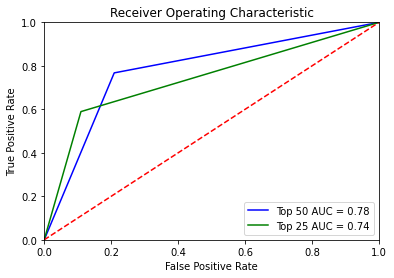

In [66]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label = 'Top 50 AUC = %0.2f' % train)
plt.plot(fpr_test, tpr_test, 'g', label = 'Top 25 AUC = %0.2f' % test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')